# [AI] FInal Presentation  
## Team 2: Choi Jungho, Kim Hayoon  


---



# 1. Motivation

# (1) Importance of Car Classification
### Cars have various properties
* 1st Class: segment of cars; A segment, B segment, C segment, ..
* 2nd Class: brand; BMW, Benz, Audi ..   
* 3rd Class: model of cars; BMW 3 series, 5 series, 7 series ..  
* Detaied Class
 * external appearance: year, color, trim
 * part: front bumper, tire, A pillar, side mirror, front door, rear door, head lamp, rear lamp, bonnet, trunk, roof .. 

Because of these various attributes, it is difficult for people to distinguish themselves.  
Nowadays, car classification are becoming more important for traffic control, traffic analysis, and identification of stolen and criminal cars. 



## (2) Related Work

1. A study on large classification(1st Class) of cars
* 김청하 박구만(2019): Classify into 3 categories, car, truck, bus
* 안호연 이종택(2019) Classify into 8 catogories, big truck, middle trunck, small truck, sedan, compact car, suv, ban
* 김정훈, 최두현(2019): Classify into 3 categories, sedan, van, truck
* 정유석, 정도영(2020): Classify sedan (1종 차량) and general truck (3종 차량)
2. A study on the detailed classification(Detailed Class) of cars
* 이창복 조현종(2020): Classify 100 model of cars in the diffenrent brand
* 이승주 박구만(2020): Classify specific model (G80 RG3) class


✔️ In the case of detailed classification of cars, accuracy tends to be less than that of large classification of cars.


## (3) Family Look
: Unifying brand identity and desion in a similar way rather than just one cars.
Multiple models of a brand share design features as if they were a family, forming an image of brand.  
### *Assumption: If we consider the Family Look and divide cars by brand, it will be an effective classification.*

[Figure 1. Family Look of BMW]  
<img src = "https://drive.google.com/uc?id=1pJSjm_uaPxAqGf6dQohgyGU9YZKOpoXg" height = 400 width = 400>

[Figure 1. Family Look of Genesis]  
<img src = "https://img1.daumcdn.net/thumb/S720x440ht.u/?fname=%2Fmedia%2Fvitraya%2Fauto%2Fimage%2Fae93ff%2FBBDE76075E3AF8918FDC76BD77D675E727859A23645A4E89FA_2HOH&scode=media" height = 400 width = 400>
<img src = "https://www.genesis.com/content/dam/genesis-p2/kr/assets/utility/sns/genesis-kr-model-g80-02-social-1200x630-ko.jpg" height = 400 width = 400>
<img src = "https://cdn.top-rider.com/news/photo/202204/62119_138763_3319.jpg" height = 400 width = 400>

# 2. Description of the data

## Using car appearance image data provided by AI-Hub  
[Figure 2. Data Description]  
<img src = "https://drive.google.com/uc?id=12H9WFh2RfXNdDRiJCT_aqtCr5-R6bJKn" height = 350 width = 600>

* Collect 3,099 cars of 100 types, build 322,664 car appearance learning data   
* AI learning dataset that identifies car appearance(car type, model, color, trim) and 14 parts(front bumper, rear bumper, tire, A pillar, C pillar, side mirror, front door, rear door, radiator grille, head lamp, rear lamp, bonnet, trunk, roof)   
* Source data: Image data(jpg) extracted from raw data(mp4) showing 360 degree of car appearance  
* Label data: Data for bounding box processing for the entire appearance on source data(jpg) and data for bounding box processing for 14 parts(JSON)

In [ ]:
# data 설명

# 3. Hyperparameter & Architecture

## (1) Data Preprocessing


In [2]:
# code v1과 v3의 공통 부분
#  (1) 데이터 로드
#  (2) trainig data, validation data, test data를 8:1:1로 나누기
import os
import splitfolders

# splitfolders.ratio(input_dest, output=base_dir, seed=1200, ratio=(.8, .1, .1))

base_dir = os.path.dirname(os.path.abspath("__file__"))
train_dir = os.path.join(base_dir, 'training')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')

In [3]:
# 이미지 처리용 라이브러리
from tensorflow.keras.preprocessing.image import ImageDataGenerator # 전처리

# 0~1 사이값으로 픽셀값을 변환
train_datagen = ImageDataGenerator(rescale=1./255)
validation_datagen = ImageDataGenerator(rescale=1./255)

# 이미지 전처리
# 폴더에 있는 이미지를 전처리
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size=(150,150),
                                                    batch_size=20,
                                                    class_mode='categorical')

validation_generator = validation_datagen.flow_from_directory(validation_dir,
                                                        target_size=(150,150),
                                                        batch_size=20,
                                                        class_mode='categorical')

Found 213820 images belonging to 11 classes.
Found 27082 images belonging to 11 classes.


In [8]:
# 라벨 이름 목록
labels_list = train_generator.class_indices
labels_list

{'AU_아우디': 0,
 'BE_벤츠': 1,
 'BM_BMW': 2,
 'CH_쉐보레': 3,
 'FO_포드': 4,
 'GE_제네시스': 5,
 'HO_혼다': 6,
 'HY_현대': 7,
 'JE_지프': 8,
 'KG_한국지엠': 9,
 'KI_기아': 10}

## (2) First Model

In [7]:
# code v1
# ResNet50 모델 사용
# optimizer로 RMSprop 사용
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras import layers
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from keras.applications import ResNet50
from keras.callbacks import ModelCheckpoint, EarlyStopping

# imagenet에 미리 훈련된 ResNet50 모델 불러오기
model = ResNet50(weights=None,
                 input_shape=(150, 150, 3), 
                 pooling=max, 
                 classes=11)


model.summary()

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 150, 150, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 156, 156, 3)  0           ['input_3[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 75, 75, 64)   9472        ['conv1_pad[0][0]']              
                                                                                                  
 conv1_bn (BatchNormalization)  (None, 75, 75, 64)   256         ['conv1_conv[0][0]']      

 conv2_block3_2_conv (Conv2D)   (None, 38, 38, 64)   36928       ['conv2_block3_1_relu[0][0]']    
                                                                                                  
 conv2_block3_2_bn (BatchNormal  (None, 38, 38, 64)  256         ['conv2_block3_2_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv2_block3_2_relu (Activatio  (None, 38, 38, 64)  0           ['conv2_block3_2_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv2_block3_3_conv (Conv2D)   (None, 38, 38, 256)  16640       ['conv2_block3_2_relu[0][0]']    
                                                                                                  
 conv2_blo

 conv3_block3_2_conv (Conv2D)   (None, 19, 19, 128)  147584      ['conv3_block3_1_relu[0][0]']    
                                                                                                  
 conv3_block3_2_bn (BatchNormal  (None, 19, 19, 128)  512        ['conv3_block3_2_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv3_block3_2_relu (Activatio  (None, 19, 19, 128)  0          ['conv3_block3_2_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv3_block3_3_conv (Conv2D)   (None, 19, 19, 512)  66048       ['conv3_block3_2_relu[0][0]']    
                                                                                                  
 conv3_blo

 conv4_block2_1_relu (Activatio  (None, 10, 10, 256)  0          ['conv4_block2_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv4_block2_2_conv (Conv2D)   (None, 10, 10, 256)  590080      ['conv4_block2_1_relu[0][0]']    
                                                                                                  
 conv4_block2_2_bn (BatchNormal  (None, 10, 10, 256)  1024       ['conv4_block2_2_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv4_block2_2_relu (Activatio  (None, 10, 10, 256)  0          ['conv4_block2_2_bn[0][0]']      
 n)                                                                                               
          

                                                                                                  
 conv4_block5_1_relu (Activatio  (None, 10, 10, 256)  0          ['conv4_block5_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv4_block5_2_conv (Conv2D)   (None, 10, 10, 256)  590080      ['conv4_block5_1_relu[0][0]']    
                                                                                                  
 conv4_block5_2_bn (BatchNormal  (None, 10, 10, 256)  1024       ['conv4_block5_2_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv4_block5_2_relu (Activatio  (None, 10, 10, 256)  0          ['conv4_block5_2_bn[0][0]']      
 n)       

 conv5_block2_1_conv (Conv2D)   (None, 5, 5, 512)    1049088     ['conv5_block1_out[0][0]']       
                                                                                                  
 conv5_block2_1_bn (BatchNormal  (None, 5, 5, 512)   2048        ['conv5_block2_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv5_block2_1_relu (Activatio  (None, 5, 5, 512)   0           ['conv5_block2_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv5_block2_2_conv (Conv2D)   (None, 5, 5, 512)    2359808     ['conv5_block2_1_relu[0][0]']    
                                                                                                  
 conv5_blo

In [9]:
from keras import optimizers

model.compile(loss='categorical_crossentropy', optimizer=optimizers.RMSprop(lr=1e-4), metrics=['acc'])

C:\Python\Python310\lib\site-packages\keras\optimizers\optimizer_v2\rmsprop.py:140: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [10]:
history = model.fit(train_generator,
                              steps_per_epoch=80,
                              epochs=50,
                              validation_data=validation_generator,
                              validation_steps=10)

Epoch 1/50
80/80 [==============================] - 132s 2s/step - loss: 1.8891 - acc: 0.3594 - val_loss: 1.9696 - val_acc: 0.3650
Epoch 2/50
80/80 [==============================] - 124s 2s/step - loss: 1.7500 - acc: 0.3531 - val_loss: 2.0235 - val_acc: 0.3850
Epoch 3/50
80/80 [==============================] - 118s 1s/step - loss: 1.7769 - acc: 0.3594 - val_loss: 2.1481 - val_acc: 0.3900
Epoch 4/50
80/80 [==============================] - 121s 2s/step - loss: 1.7653 - acc: 0.3381 - val_loss: 2.2846 - val_acc: 0.0950
Epoch 5/50
80/80 [==============================] - 121s 2s/step - loss: 1.8189 - acc: 0.3275 - val_loss: 2.1423 - val_acc: 0.4150
Epoch 6/50
80/80 [==============================] - 122s 2s/step - loss: 1.7179 - acc: 0.3613 - val_loss: 2.0871 - val_acc: 0.1550
Epoch 7/50
80/80 [==============================] - 127s 2s/step - loss: 1.7827 - acc: 0.3413 - val_loss: 1.7741 - val_acc: 0.3800
Epoch 8/50
80/80 [==============================] - 133s 2s/step - loss: 1.7007 - a

[0.36500000953674316, 0.38499999046325684, 0.38999998569488525, 0.0949999988079071, 0.41499999165534973, 0.1550000011920929, 0.3799999952316284, 0.4350000023841858, 0.3199999928474426, 0.23000000417232513, 0.4050000011920929, 0.2549999952316284, 0.2800000011920929, 0.36000001430511475, 0.39500001072883606, 0.4050000011920929, 0.26499998569488525, 0.24500000476837158, 0.3449999988079071, 0.3100000023841858, 0.23499999940395355, 0.20999999344348907, 0.24500000476837158, 0.36500000953674316, 0.33500000834465027, 0.28999999165534973, 0.3799999952316284, 0.375, 0.23499999940395355, 0.2849999964237213, 0.2800000011920929, 0.35499998927116394, 0.35499998927116394, 0.4350000023841858, 0.39500001072883606, 0.3149999976158142, 0.25, 0.23000000417232513, 0.28999999165534973, 0.3449999988079071, 0.39500001072883606, 0.29499998688697815, 0.4399999976158142, 0.42500001192092896, 0.32499998807907104, 0.3799999952316284, 0.2800000011920929, 0.2849999964237213, 0.2800000011920929, 0.41499999165534973]


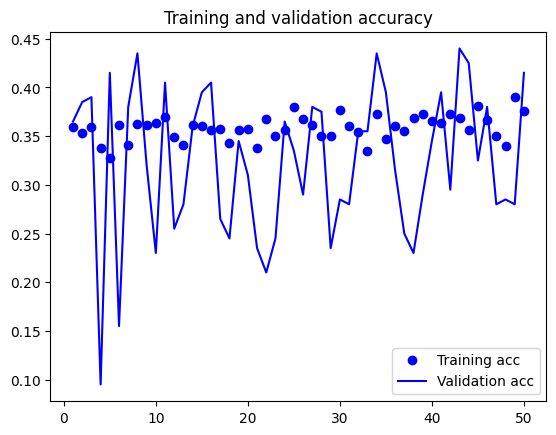

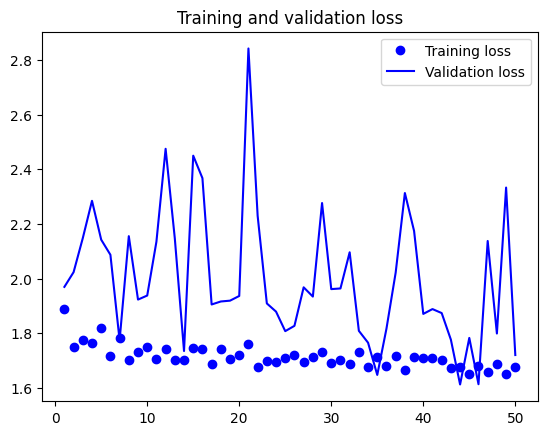

In [11]:
import matplotlib.pyplot as plt

acc = history.history['acc'] 
val_acc = history.history['val_acc'] 
loss = history.history['loss'] 
val_loss = history.history['val_loss']

print(val_acc)

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc') 
plt.plot(epochs, val_acc, 'b', label='Validation acc') 
plt.title('Training and validation accuracy') 
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss') 
plt.plot(epochs, val_loss, 'b', label='Validation loss') 
plt.title('Training and validation loss') 
plt.legend()

plt.show()

## (3) Second Model

In [12]:
# code v3
# 일반 모델 사용
# checkpoint 저장
# early stop 사용
# optimizer로 Adam 사용

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras import layers
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from keras.applications import ResNet50
from keras.callbacks import ModelCheckpoint, EarlyStopping


checkpoint_path = os.path.join(base_dir, 'model_{epoch:02d}.hdf5')
earlystop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)
modelckpt = ModelCheckpoint(checkpoint_path, monitor='val_acc', verbose=1, save_best_only=True)
callback = [earlystop, modelckpt]

model = Sequential()

model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3))) 
model.add(layers.MaxPooling2D((2, 2))) 
model.add(layers.Conv2D(64, (3, 3), activation='relu')) 
model.add(layers.MaxPooling2D((2, 2))) 
model.add(layers.Conv2D(128, (3, 3), activation='relu')) 
model.add(layers.MaxPooling2D((2, 2))) 
model.add(layers.Conv2D(128, (3, 3), activation='relu')) 
model.add(layers.MaxPooling2D((2, 2))) 

model.add(Flatten())
#완전 분류기 직전에 dropout 추가하기 (data augmentation 사용했기 때문)
# model.add(Dropout(0.5))
model.add(Dense(units=512, activation="relu"))
model.add(Dropout(0.5))
# 마지막 dense layer의 크기는 class 개수와 같아야 함
model.add(Dense(units=11, activation="softmax"))

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 74, 74, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 17, 17, 128)     

In [13]:
from tensorflow.keras import optimizers

model.compile(loss="categorical_crossentropy",
              optimizer=optimizers.Adam(lr=1e-4),
              metrics=['acc'])


C:\Python\Python310\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [14]:
history = model.fit(train_generator,
                              steps_per_epoch=48,
                              epochs=50,
                              validation_data=validation_generator,
                              validation_steps=6,
                              callbacks=[earlystop, modelckpt])

Epoch 1/50
48/48 [==============================] - ETA: 0s - loss: 1.8451 - acc: 0.3615
Epoch 1: val_acc improved from -inf to 0.40000, saving model to C:\Users\master\Desktop\ai_project\model_01.hdf5
48/48 [==============================] - 17s 345ms/step - loss: 1.8451 - acc: 0.3615 - val_loss: 1.7026 - val_acc: 0.4000
Epoch 2/50
48/48 [==============================] - ETA: 0s - loss: 1.7483 - acc: 0.3542
Epoch 2: val_acc did not improve from 0.40000
48/48 [==============================] - 16s 335ms/step - loss: 1.7483 - acc: 0.3542 - val_loss: 1.7142 - val_acc: 0.3667
Epoch 3/50
48/48 [==============================] - ETA: 0s - loss: 1.7379 - acc: 0.3510
Epoch 3: val_acc did not improve from 0.40000
48/48 [==============================] - 16s 337ms/step - loss: 1.7379 - acc: 0.3510 - val_loss: 1.5411 - val_acc: 0.4000
Epoch 4/50
48/48 [==============================] - ETA: 0s - loss: 1.7083 - acc: 0.3792
Epoch 4: val_acc improved from 0.40000 to 0.45000, saving model to C:\Use

[0.4000000059604645, 0.36666667461395264, 0.4000000059604645, 0.44999998807907104, 0.4166666567325592, 0.375, 0.38333332538604736, 0.4416666626930237, 0.4166666567325592, 0.44999998807907104, 0.3333333432674408, 0.38333332538604736, 0.3333333432674408, 0.4166666567325592, 0.3916666805744171, 0.46666666865348816, 0.32499998807907104, 0.38333332538604736]


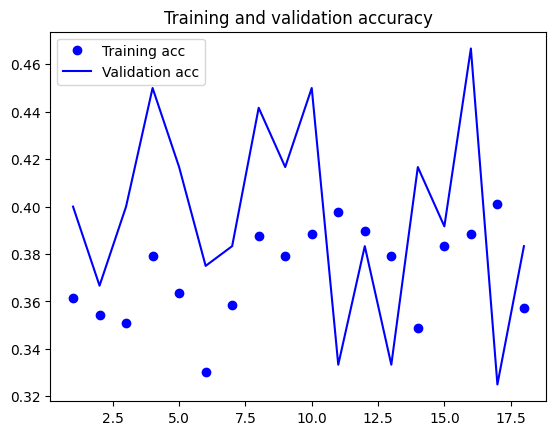

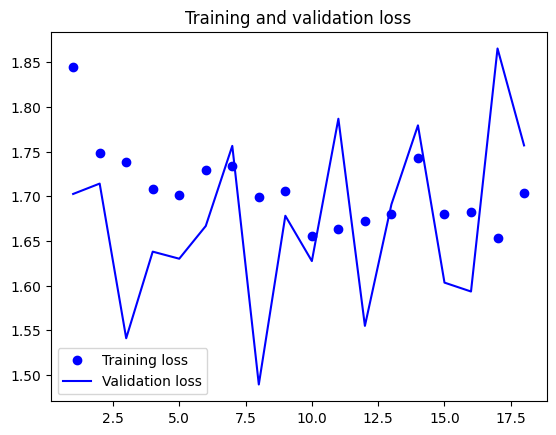

In [15]:
import matplotlib.pyplot as plt

acc = history.history['acc'] 
val_acc = history.history['val_acc'] 
loss = history.history['loss'] 
val_loss = history.history['val_loss']

print(val_acc)

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc') 
plt.plot(epochs, val_acc, 'b', label='Validation acc') 
plt.title('Training and validation accuracy') 
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss') 
plt.plot(epochs, val_loss, 'b', label='Validation loss') 
plt.title('Training and validation loss') 
plt.legend()

plt.show()

# 4. Result

In [16]:
#test result
# 저장된 가장 좋은 모델로 test data set evaluate

test_datagen = ImageDataGenerator(rescale=1./255)


test_generator = test_datagen.flow_from_directory(test_dir,
                                                target_size=(150,150),
                                                batch_size=20,
                                                class_mode='categorical')

model_path = os.path.join(base_dir, 'model_12.hdf5')
model.load_weights(model_path)
model.evaluate(test_generator)

Found 13535 images belonging to 11 classes.
677/677 [==============================] - 143s 211ms/step - loss: 1.6606 - acc: 0.3948


[1.660631537437439, 0.3948282301425934]

# 5. Insight and Discussion

1. Compared to the large classification, which has a large difference in appearance, the performance of similar size cars be poor.  
2. It is more difficult to classify because the image data is not the entire appearance of the cars but the appearance specific part data of car.
3. Even for the same car model, image data taken at night or in different colors, so if it was gray-scaled, it would be better classified.
4. If we use models that specialized in image classification (such as ResNet) more suitable for data, we could improve the performance.

# 6. Reference

[1] 김한겸, 안유림 외 6. (2021). 2-stage Classification Model of vehicles based on CNN Algorithm. ACK 2021 학술발표대회 논문집, 28(2)   
[2] 김청화·박구만. (2019). A Study of Traffic Detection and Classification using Yolo, 한국방송미디어공학회 학술발표대회 논문집, 80-82.    
[3] 안호연·이종택. (2018). Classification of vehicles based on Faster R-CNN suitable for use in actual road environments. 한국지능시스템학회 논문지 , 28(3): 210-218.    
[4] 김정훈·최두현. (2019). Implementation of a Vehicle Traffic and Speed Estimation System Using Faster R-CNN. 한국통신학회논문지 , 44(9): 1754-1758.    
[5] 정유석·정도영. (2020). Class 1·3 Vehicle Classification Using Deep Learning and Thermal Image. 한국ITS 학회논문지 , 19(6): 96-106.    
[6] 이창복·조현종. (2020). Classification  of  car  models  using  deep  learning , 149-150.    
[7] 이승주·박구만. (2020). Proposal for License Plate Recognition Using Synthetic Data and Vehicle Type Recognition System. 방송공학회논문지 , 25(5): 776-788.
